## Final Project Submission

In [2]:
# Your code here - remember to use markdown cells for comments as well!
#import necessary libraries
import requests
import json

In [3]:
response = requests.get('http://bechdeltest.com/api/v1/getMoviesByTitle?') #make the api request

In [4]:
print(response.status_code) #status code 200 means "Everything went okay, and the result has been returned (if any)."

200


In [5]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

[
    {
        "date": "2019-08-10 22:19:59",
        "dubious": "1",
        "id": 8811,
        "imdbid": "10781754",
        "rating": 3,
        "submitterid": 17287,
        "title": "American Terrorist:  April 20, 1999",
        "visible": "1",
        "year": 2021
    },
    {
        "date": "2020-01-17 15:08:59",
        "dubious": "0",
        "id": 8965,
        "imdbid": "8151874",
        "rating": 0,
        "submitterid": 17564,
        "title": "Honey Boy",
        "visible": "1",
        "year": 2020
    },
    {
        "date": "2020-01-15 06:50:26",
        "dubious": "0",
        "id": 8964,
        "imdbid": "7545266",
        "rating": 3,
        "submitterid": 17557,
        "title": "Like a Boss",
        "visible": "1",
        "year": 2020
    },
    {
        "date": "2019-09-24 19:53:51",
        "dubious": "0",
        "id": 8859,
        "imdbid": "8461042",
        "rating": 3,
        "submitterid": 17361,
        "title": "Marijuana Conspiracy , The",


In [6]:
movie_container = response.json() #make the response equal to a variable

In [7]:
import pandas as pd
from pandas.io.json import json_normalize
json_normalize(movie_container) #importing more libraries and making the data have a cleaner appearance

,year,rating,dubious,imdbid,date,submitterid,id,visible,title
0,2021,3,1,10781754,2019-08-10 22:19:59,17287,8811,1,"American Terrorist: April 20, 1999"
1,2020,0,0,8151874,2020-01-17 15:08:59,17564,8965,1,Honey Boy
2,2020,3,0,7545266,2020-01-15 06:50:26,17557,8964,1,Like a Boss
3,2020,3,0,8461042,2019-09-24 19:53:51,17361,8859,1,"Marijuana Conspiracy , The"
4,2019,0,0,8579674,2020-01-13 19:28:36,17552,8962,1,1917
...,...,...,...,...,...,...,...,...,...
8358,1896,0,0,0000131,2014-04-20 02:04:35,9969,5406,1,Une nuit terrible
8359,1895,0,0,0132134,2015-04-13 01:54:41,11867,6200,1,"Execution of Mary, Queen of Scots, The"
8360,1895,0,0,0000014,2014-05-04 13:11:04,10070,5444,1,Tables Turned on the Gardener
8361,1892,0,0,0000003,2014-05-02 10:01:07,10044,5433,1,Pauvre Pierrot


In [182]:
bechdel_test = json_normalize(movie_container)
bechdel_test.columns #defining the variable and looking at the columns to see what information is needed

Index(['year', 'rating', 'dubious', 'imdbid', 'date', 'submitterid', 'id',
       'visible', 'title'],
      dtype='object')

In [183]:
bechdel_test.reset_index(drop=True, inplace=True) #reset the index to clean up the data

In [184]:
bechdel_test_index = bechdel_test[['title', 'year','rating']] #assigning new variable to show only columns that are necessary

In [185]:
bechdel_test_graph = bechdel_test_index[(bechdel_test_index['year'] >= 1900) & (bechdel_test_index['year'] <= 2019)] #changing the year range to only include the movies from 1900 - 2019, and removing the extraneous data.

In [186]:
bechdel_test_graph.reset_index(drop=True, inplace=True) #resetting the index to clean up the data
bechdel_test_graph

,title,year,rating
0,1917,2019,0
1,A Beautiful Day in the Neighborhood,2019,2
2,A Dog&#39;s Journey,2019,3
3,Abominable,2019,1
4,Ad Astra,2019,1
...,...,...,...
8341,Hamlet ( Le Duel d&#39;Hamlet),1900,0
8342,Let Me Dream Again,1900,0
8343,"One-Man Band, The",1900,0
8344,"Searching Ruins on Broadway, Galveston, for De...",1900,0


In [187]:
bechdel_test_graph.replace([0,1,2,3] ,[0,0,0,1], inplace=True) #replacing the bechdel test scores with 0(Fail) 1(Pass) to make it easier to graph
bechdel_test_graph

,title,year,rating
0,1917,2019,0
1,A Beautiful Day in the Neighborhood,2019,0
2,A Dog&#39;s Journey,2019,1
3,Abominable,2019,0
4,Ad Astra,2019,0
...,...,...,...
8341,Hamlet ( Le Duel d&#39;Hamlet),1900,0
8342,Let Me Dream Again,1900,0
8343,"One-Man Band, The",1900,0
8344,"Searching Ruins on Broadway, Galveston, for De...",1900,0


In [198]:
pass_df = bechdel_test_graph[bechdel_test_graph['rating'] == 1] #creating a new variable just for the passing movies
pass_df

,title,year,rating
2,A Dog&#39;s Journey,2019,1
5,"Aeronauts, The",2019,1
6,After,2019,1
7,Aladdin,2019,1
8,Alita: Battle Angel,2019,1
...,...,...,...
8288,Rebecca of Sunnybrook Farm,1917,1
8289,Gretchen the Greenhorn,1916,1
8291,Lady Windermere&#39;s Fan,1916,1
8292,Snow White,1916,1


In [203]:
fail_df = bechdel_test_graph[bechdel_test_graph['rating'] == 0] #creating a new variable just for the failing movies
fail_df

,title,year,rating
0,1917,2019,0
1,A Beautiful Day in the Neighborhood,2019,0
3,Abominable,2019,0
4,Ad Astra,2019,0
15,"Art of Racing in the Rain, The",2019,0
...,...,...,...
8341,Hamlet ( Le Duel d&#39;Hamlet),1900,0
8342,Let Me Dream Again,1900,0
8343,"One-Man Band, The",1900,0
8344,"Searching Ruins on Broadway, Galveston, for De...",1900,0


In [219]:
passing_bechdel_1900 = pass_df[(pass_df['year'] >= 1900) & (pass_df['year'] <= 1910)] #creating a new variable just for the passing movies of 1900 - 1910
passing_bechdel_1900

,title,year,rating
8303,Tilly the Tomboy Visits the Poor,1910,1


In [210]:
failing_bechdel_1900 = fail_df[(fail_df['year'] >= 1900) & (fail_df['year'] <= 1910)] #creating a new variable just for the failing movies of 1900 - 1910
failing_bechdel_1900

,title,year,rating
8301,A Trip to Mars,1910,0
8302,Mobilier fidele,1910,0
8304,"Devilish Tenant, The",1909,0
8305,Le barometre de la fidelite,1909,0
8306,"Princess Nicotine; or, The Smoke Fairy",1909,0
8307,Unusual Cooking,1908,0
8308,"Eclipse: Courtship of the Sun and Moon, The",1907,0
8309,Good Glue Sticks,1907,0
8310,"400 Tricks of the Devil, The",1906,0
8311,A Funny Shave,1906,0


In [213]:
passing_bechdel_1910 = pass_df[(pass_df['year'] >= 1910) & (pass_df['year'] <= 1920)] #creating a new variable just for the passing movies of 1910 - 1920
passing_bechdel_1910

,title,year,rating
8276,Pollyanna,1920,1
8277,Within Our Gates,1920,1
8279,When the Clouds Roll by,1919,1
8281,Ich mochte kein Mann sein,1918,1
8282,Stella Maris,1918,1
8283,Tarzan of the Apes,1918,1
8285,A Tale of Two Cities,1917,1
8286,"Poor Little Rich Girl, The",1917,1
8288,Rebecca of Sunnybrook Farm,1917,1
8289,Gretchen the Greenhorn,1916,1


In [214]:
failing_bechdel_1910 = fail_df[(fail_df['year'] >= 1920) & (fail_df['year'] <= 1920)] #creating a new variable just for the failing movies of 1910 - 1920
failing_bechdel_1910

,title,year,rating
8275,"Cabinet of Dr. Caligari, The",1920,0


In [220]:
passing_bechdel_1920 = pass_df[(pass_df['year'] >= 1920) & (pass_df['year'] <= 1930)] #creating a new variable just for the passing movies of 1920 - 1930
passing_bechdel_1920

,title,year,rating
8186,Animal Crackers,1930,1
8187,Anna Christie,1930,1
8188,"Bat Whispers, The",1930,1
8192,Ladies of Leisure,1930,1
8193,Min and Bill,1930,1
8195,Murder!,1930,1
8197,Broadway Melody,1929,1
8199,Juno and the Paycock [The Shame of Mary Boyle],1929,1
8201,Pandora&#39;s Box (Die B&uuml;chse der Pandora),1929,1
8213,"Patsy, The",1928,1


In [221]:
failing_bechdel_1920 = fail_df[(fail_df['year'] >= 1920) & (fail_df['year'] <= 1930)] #creating a new variable just for the failing movies of 1920 - 1930
failing_bechdel_1920

,title,year,rating
8185,All Quiet on the Western Front,1930,0
8189,Be Yourself,1930,0
8190,"Blue Angel, The",1930,0
8191,L&#39;Age d&#39;Or,1930,0
8194,Morocco,1930,0
...,...,...,...
8269,"Paleface, The",1922,0
8270,"Phantom, The",1922,0
8272,K&ouml;rkarlen (The Phantom Carriage),1921,0
8273,"Kid, The",1921,0


In [224]:
passing_bechdel_1930 = pass_df[(pass_df['year'] >= 1930) & (pass_df['year'] <= 1940)] #creating a new variable just for the passing movies of 1930 - 1940
passing_bechdel_1930

,title,year,rating
7970,Anne Of Windy Poplars,1940,1
7971,"Ape, The",1940,1
7975,"Dance, Girl, Dance",1940,1
7978,Gaslight,1940,1
7979,"Grapes of Wrath, The",1940,1
...,...,...,...
8187,Anna Christie,1930,1
8188,"Bat Whispers, The",1930,1
8192,Ladies of Leisure,1930,1
8193,Min and Bill,1930,1


In [225]:
failing_bechdel_1930 = fail_df[(fail_df['year'] >= 1930) & (fail_df['year'] <= 1940)] #creating a new variable just for the failing movies of 1930 - 1940
failing_bechdel_1930

,title,year,rating
7968,A Chump at Oxford,1940,0
7969,"All This, and Heaven Too",1940,0
7972,Boom Town,1940,0
7973,Chamber of Horrors / Door with the Seven Locks,1940,0
7974,Comrade X,1940,0
...,...,...,...
8185,All Quiet on the Western Front,1930,0
8189,Be Yourself,1930,0
8190,"Blue Angel, The",1930,0
8191,L&#39;Age d&#39;Or,1930,0


In [228]:
passing_bechdel_1940 = pass_df[(pass_df['year'] >= 1940) & (pass_df['year'] <= 1950)] #creating a new variable just for the passing movies of 1940 - 1950
passing_bechdel_1940

,title,year,rating
7762,All About Eve,1950,1
7764,Born Yesterday,1950,1
7765,Cinderella,1950,1
7770,Les enfants terribles,1950,1
7771,No Way Out,1950,1
...,...,...,...
7988,Pride and Prejudice,1940,1
7989,Primrose Path,1940,1
7990,Rebecca,1940,1
7993,"Sea Hawk, The",1940,1


In [229]:
failing_bechdel_1940 = fail_df[(fail_df['year'] >= 1940) & (fail_df['year'] <= 1950)] #creating a new variable just for the failing movies of 1940 - 1950
failing_bechdel_1940

,title,year,rating
7763,"Asphalt Jungle, The",1950,0
7766,D.O.A.,1950,0
7767,"Flying Saucer, The",1950,0
7768,Harvey,1950,0
7769,In a Lonely Place,1950,0
...,...,...,...
7987,Pinocchio,1940,0
7991,"Return of Frank James, The",1940,0
7992,Santa Fe Trail,1940,0
7995,Strange Cargo,1940,0


In [232]:
passing_bechdel_1950 = pass_df[(pass_df['year'] >= 1950) & (pass_df['year'] <= 1960)] #creating a new variable just for the passing movies of 1950 - 1960
passing_bechdel_1950

,title,year,rating
7488,"Apartment, The",1960,1
7489,Black Sunday,1960,1
7490,Body in the Web,1960,1
7491,"Brides of Dracula, The",1960,1
7492,"City of the Dead, The",1960,1
...,...,...,...
7772,Odette,1950,1
7775,Scandal,1950,1
7776,Stage Fright,1950,1
7777,Summer Stock,1950,1


In [233]:
failing_bechdel_1950 = fail_df[(fail_df['year'] >= 1950) & (fail_df['year'] <= 1960)] #creating a new variable just for the failing movies of 1950 - 1960
failing_bechdel_1950

,title,year,rating
7487,A bout de souffle,1960,0
7497,La Dolce Vita,1960,0
7499,Le Trou,1960,0
7501,Let&#39;s Make Love,1960,0
7502,"Magnificent Seven, The",1960,0
...,...,...,...
7768,Harvey,1950,0
7769,In a Lonely Place,1950,0
7773,Orpheus,1950,0
7774,Rashomon,1950,0


In [237]:
passing_bechdel_1960 = pass_df[(pass_df['year'] >= 1960) & (pass_df['year'] <= 1970)] #creating a new variable just for the passing movies of 1960 - 1970
passing_bechdel_1960

,title,year,rating
7153,Airport,1970,1
7154,"AristoCats, The",1970,1
7155,Bambule,1970,1
7156,Beyond the Valley of the Dolls,1970,1
7158,Carry It On,1970,1
...,...,...,...
7510,"Story of Ruth, The",1960,1
7512,"Truth, The",1960,1
7513,"Virgin Spring, The",1960,1
7515,Wild River,1960,1


In [238]:
failing_bechdel_1960 = fail_df[(fail_df['year'] >= 1960) & (fail_df['year'] <= 1970)] #creating a new variable just for the failing movies of 1960 - 1970
failing_bechdel_1960

,title,year,rating
7157,"Boys in the Band, The",1970,0
7161,Colossus: The Forbin Project,1970,0
7164,Deep End,1970,0
7168,House of Dark Shadows,1970,0
7169,Le Cercle Rouge,1970,0
...,...,...,...
7507,School for Scoundrels,1960,0
7508,Shoot the Piano Player,1960,0
7509,Spartacus,1960,0
7511,Testament of Orpheus,1960,0


In [241]:
passing_bechdel_1970 = pass_df[(pass_df['year'] >= 1970) & (pass_df['year'] <= 1980)] #creating a new variable just for the passing movies of 1970 - 1980
passing_bechdel_1970

,title,year,rating
6782,Airplane!,1980,1
6784,Atlantic City,1980,1
6788,Can&#39;t Stop the Music,1980,1
6790,Coal Miner&#39;s Daughter,1980,1
6792,Fade to Black,1980,1
...,...,...,...
7167,Five Easy Pieces,1970,1
7170,Les novices,1970,1
7178,Taste the Blood of Dracula,1970,1
7182,Two Mules for Sister Sara,1970,1


In [242]:
failing_bechdel_1970 = fail_df[(fail_df['year'] >= 1970) & (fail_df['year'] <= 1980)] #creating a new variable just for the failing movies of 1970 - 1980
failing_bechdel_1970

,title,year,rating
6783,Any Which Way You Can,1980,0
6785,Battle Beyond the Stars,1980,0
6786,"Blue Lagoon, The",1980,0
6787,"Blues Brothers, The",1980,0
6789,Cannibal Holocaust,1980,0
...,...,...,...
7177,Scars of Dracula,1970,0
7179,"Things of Life, The",1970,0
7180,Tora! Tora! Tora!,1970,0
7181,Tristana,1970,0


In [243]:
passing_bechdel_1980 = pass_df[(pass_df['year'] >= 1980) & (pass_df['year'] <= 1990)] #creating a new variable just for the passing movies of 1980 - 1990
passing_bechdel_1980

,title,year,rating
6154,A Little Night Music,1990,1
6155,A Tale of Springtime,1990,1
6157,Alice,1990,1
6158,An Angel at My Table,1990,1
6160,Barbarian Queen II: The Empress Strikes Back,1990,1
...,...,...,...
6812,"Pepi, Luci, Bom and Other Girls Like Mom",1980,1
6813,Popeye,1980,1
6814,Private Benjamin,1980,1
6820,Superman II,1980,1


In [244]:
failing_bechdel_1980 = fail_df[(fail_df['year'] >= 1980) & (fail_df['year'] <= 1990)] #creating a new variable just for the failing movies of 1980 - 1990
failing_bechdel_1980

,title,year,rating
6156,Air America,1990,0
6159,Back to the Future Part III,1990,0
6162,"Bonfire of the Vanities, The",1990,0
6164,Class of 1999,1990,0
6165,Close-Up,1990,0
...,...,...,...
6815,Raging Bull,1980,0
6816,Resurrection,1980,0
6817,"Shining, The",1980,0
6818,Somewhere in Time,1980,0


In [245]:
passing_bechdel_1990 = pass_df[(pass_df['year'] >= 1990) & (pass_df['year'] <= 2000)] #creating a new variable just for the passing movies of 1990 - 2000
passing_bechdel_1990

,title,year,rating
5056,102 Dalmatians,2000,1
5057,28 Days,2000,1
5058,"6th Day, The",2000,1
5059,A Good Baby,2000,1
5060,Almost Famous,2000,1
...,...,...,...
6219,Tremors,1990,1
6220,Troll 2,1990,1
6221,"Welcome Home, Roxy Carmichael",1990,1
6222,Where the Heart Is,1990,1


In [246]:
failing_bechdel_1990 = fail_df[(fail_df['year'] >= 1990) & (fail_df['year'] <= 2000)] #creating a new variable just for the failing movies of 1990 - 2000
failing_bechdel_1990

,title,year,rating
5062,American Psycho,2000,0
5063,Amores Perros,2000,0
5064,An Extremely Goofy Movie,2000,0
5065,Autumn in New York,2000,0
5067,Bamboozlee,2000,0
...,...,...,...
6215,Stella,1990,0
6217,Teenage Mutant Ninja Turtles,1990,0
6218,Total Recall,1990,0
6223,White Hunter Black Heart,1990,0


In [247]:
passing_bechdel_2000 = pass_df[(pass_df['year'] >= 2000) & (pass_df['year'] <= 2010)] #creating a new variable just for the passing movies of 2000 - 2010
passing_bechdel_2000

,title,year,rating
2700,&#39;Tamara Drewe&#39;,2010,1
2701,127 Hours,2010,1
2703,16 Wishes,2010,1
2706,30 Days of Night: Dark Days,2010,1
2707,4.3.2.1,2010,1
...,...,...,...
5196,What Lies Beneath,2000,1
5198,What&#39;s Cooking?,2000,1
5199,Where the Heart Is,2000,1
5200,"Whole Nine Yards, The",2000,1


In [248]:
failing_bechdel_2000 = fail_df[(fail_df['year'] >= 2000) & (fail_df['year'] <= 2010)] #creating a new variable just for the failing movies of 2000 - 2010
failing_bechdel_2000

,title,year,rating
2702,13 Assassins,2010,0
2704,18 comidas,2010,0
2705,22 Bullets / L&#39;immortel,2010,0
2712,"A-Team, The",2010,0
2714,"Accursed, The",2010,0
...,...,...,...
5194,Vertical Limit,2000,0
5195,"Way of the Gun, The",2000,0
5197,What Women Want,2000,0
5202,Wonder Boys,2000,0


In [249]:
passing_bechdel_2010 = pass_df[(pass_df['year'] >= 2010) & (pass_df['year'] <= 2019)] #creating a new variable just for the passing movies of 2010 - 2019
passing_bechdel_2010

,title,year,rating
2,A Dog&#39;s Journey,2019,1
5,"Aeronauts, The",2019,1
6,After,2019,1
7,Aladdin,2019,1
8,Alita: Battle Angel,2019,1
...,...,...,...
3038,"Women on the 6th Floor, The",2010,1
3040,XXXHOLiC: Ro,2010,1
3041,YellowBrickRoad,2010,1
3043,You Again,2010,1


In [250]:
failing_bechdel_2010 = fail_df[(fail_df['year'] >= 2010) & (fail_df['year'] <= 2019)] #creating a new variable just for the failing movies of 2010 - 2019
failing_bechdel_2010

,title,year,rating
0,1917,2019,0
1,A Beautiful Day in the Neighborhood,2019,0
3,Abominable,2019,0
4,Ad Astra,2019,0
15,"Art of Racing in the Rain, The",2019,0
...,...,...,...
3033,Who We Are,2010,0
3034,Wild Target,2010,0
3036,"Wolfman, The",2010,0
3039,Wrecked,2010,0


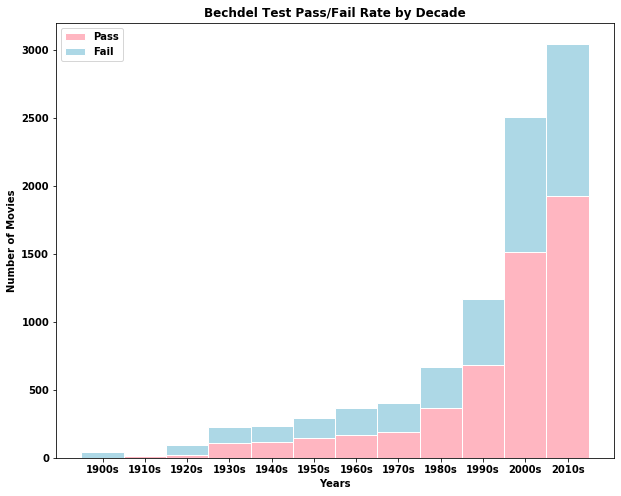

In [254]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each bar
pass_bars = [1,13,23,111,114,144,165,192,363,679,1512,1926]
fail_bars = [44,1,70,117,121,149,199,211,305,491,992,1119]

# Create size of the graph
plt.figure(figsize=(10,8))

# Heights of bars1 + bars2, which are labeled as pass/fail
bars = np.add(pass_bars, fail_bars).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11]
 
# Names of x tixs and bar width
years = ['1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
barWidth = 1
 
# Create bottom (pass) bars
plt.bar(r, pass_bars, color='lightpink', edgecolor='white', label ='Pass', width=barWidth)
# Create top (fail), on top of the (pass) bars
plt.bar(r, fail_bars, bottom=pass_bars, color='lightblue', edgecolor='white', label ='Fail', width=barWidth)

# Custom X & Y axis labels
plt.xticks(r, years, fontweight='bold')
plt.xlabel("Years", fontweight='bold')
plt.ylabel("Number of Movies", fontweight='bold')
plt.title("Bechdel Test Pass/Fail Rate by Decade", fontweight='bold')
 
# Creating legend and showing graphic
plt.legend()
plt.show()

In [309]:
passing_bechdel_2010 = pass_df[(pass_df['year'] == 2010)] #creating a new variable just for the passing movies of 2010
passing_bechdel_2010

,title,year,rating
2700,&#39;Tamara Drewe&#39;,2010,1
2701,127 Hours,2010,1
2703,16 Wishes,2010,1
2706,30 Days of Night: Dark Days,2010,1
2707,4.3.2.1,2010,1
...,...,...,...
3038,"Women on the 6th Floor, The",2010,1
3040,XXXHOLiC: Ro,2010,1
3041,YellowBrickRoad,2010,1
3043,You Again,2010,1


In [310]:
failing_bechdel_2010 = fail_df[(fail_df['year'] == 2010)] #creating a new variable just for the failing movies of 2010
failing_bechdel_2010

,title,year,rating
2702,13 Assassins,2010,0
2704,18 comidas,2010,0
2705,22 Bullets / L&#39;immortel,2010,0
2712,"A-Team, The",2010,0
2714,"Accursed, The",2010,0
...,...,...,...
3033,Who We Are,2010,0
3034,Wild Target,2010,0
3036,"Wolfman, The",2010,0
3039,Wrecked,2010,0


In [311]:
passing_bechdel_2011 = pass_df[(pass_df['year'] == 2011)] #creating a new variable just for the passing movies of 2011
passing_bechdel_2011

,title,year,rating
2338,11 Flowers,2011,1
2339,17 Girls,2011,1
2340,17 Miracles,2011,1
2343,A 2nd Chance,2011,1
2344,A Dangerous Method,2011,1
...,...,...,...
2694,Yelling to the Sky,2011,1
2695,You Instead,2011,1
2696,You&#39;re Next,2011,1
2697,Young Adult,2011,1


In [312]:
failing_bechdel_2011 = fail_df[(fail_df['year'] == 2011)] #creating a new variable just for the failing movies of 2011
failing_bechdel_2011

,title,year,rating
2337,&Aacute; annan veg,2011,0
2341,30 Minutes or Less,2011,0
2342,50/50,2011,0
2350,A torinoi lo,2011,0
2352,A Very Harold &amp; Kumar 3D Christmas,2011,0
...,...,...,...
2684,When Pigs Have Wings,2011,0
2687,Winnie the Pooh,2011,0
2690,Wuthering Heights,2011,0
2692,xxxHolic Ro Adayume,2011,0


In [313]:
passing_bechdel_2012 = pass_df[(pass_df['year'] == 2012)] #creating a new variable just for the passing movies of 2012
passing_bechdel_2012

,title,year,rating
1991,2 Days in New York,2012,1
1994,A Late Quartet,2012,1
1995,A Royal Affair,2012,1
1997,About Cherry,2012,1
1998,Abraham Lincoln: Vampire Hunter,2012,1
...,...,...,...
2330,Women&#39;s Day (Dzien kobiet),2012,1
2331,Won&#39;t Back Down,2012,1
2334,Wreck-It Ralph,2012,1
2335,Zero Dark Thirty,2012,1


In [314]:
failing_bechdel_2012 = fail_df[(fail_df['year'] == 2012)] #creating a new variable just for the failing movies of 2012
failing_bechdel_2012

,title,year,rating
1990,2 Coelhos,2012,0
1992,21 Jump Street,2012,0
1993,A Halloween Puppy,2012,0
1996,A Thousand Words,2012,0
1999,Act of Valor,2012,0
...,...,...,...
2323,"Watch, The",2012,0
2328,Wireboy,2012,0
2329,"Woman in Black, The",2012,0
2332,"Words, The",2012,0


In [272]:
passing_bechdel_2013 = pass_df[(pass_df['year'] == 2013)] #creating a new variable just for the passing movies of 2013
passing_bechdel_2013

,title,year,rating
1584,+1,2013,1
1586,12 Years a Slave,2013,1
1589,20 Feet from Stardom,2013,1
1591,300 Worte Deutsch,2013,1
1592,3096 Tage,2013,1
...,...,...,...
1977,World War Z,2013,1
1981,Yeh Jawaani Hai Deewani,2013,1
1982,Yip Man: Jung gik yat jin,2013,1
1983,"Young and Prodigious T.S. Spivet, The",2013,1


In [273]:
failing_bechdel_2013 = fail_df[(fail_df['year'] == 2013)] #creating a new variable just for the failing movies of 2013
failing_bechdel_2013

,title,year,rating
1585,100-Year-Old Man Who Climbed Out the Window an...,2013,0
1587,138 segons. L&#39;enigma Girones,2013,0
1588,2 Guns,2013,0
1590,21 &amp; Over,2013,0
1593,42,2013,0
...,...,...,...
1984,Young Detective Dee: Rise of the Sea Dragon,2013,0
1985,"Zero Theorem, The",2013,0
1986,Zipi y Zape y el club de la canica,2013,0
1988,"Zoran, il mio nipote scemo",2013,0


In [315]:
passing_bechdel_2014 = pass_df[(pass_df['year'] == 2014)] #creating a new variable just for the passing movies of 2014
passing_bechdel_2014

,title,year,rating
1202,3 Days to Kill,2014,1
1204,5 Flights Up,2014,1
1207,A Girl Walks Home Alone at Night,2014,1
1208,A Long Way Down,2014,1
1210,A Most Violent Year,2014,1
...,...,...,...
1576,Women Aren&#39;t Funny,2014,1
1577,Wyrmwood: Road of the Dead,2014,1
1579,You&#39;re Not You,2014,1
1582,Zero Motivation,2014,1


In [316]:
failing_bechdel_2014 = fail_df[(fail_df['year'] == 2014)] #creating a new variable just for the failing movies of 2014
failing_bechdel_2014

,title,year,rating
1200,&#39;71,2014,0
1201,22 Jump St,2014,0
1203,300: Rise of an Empire,2014,0
1205,A Brilliant Young Mind,2014,0
1206,A coup sur,2014,0
...,...,...,...
1567,Whiplash,2014,0
1569,Who Am I - Kein System ist sicher,2014,0
1578,X-Men: Days of Future Past,2014,0
1580,Young Ones,2014,0


In [317]:
passing_bechdel_2015 = pass_df[(pass_df['year'] == 2015)] #creating a new variable just for the passing movies of 2015
passing_bechdel_2015

,title,year,rating
880,"33, The",2015,1
881,"3Tails Movie: A Mermaid Adventure, The",2015,1
882,45 Years,2015,1
884,7 Letters,2015,1
885,A Country Called Home,2015,1
...,...,...,...
1190,"VVitch: A New-England Folktale, The",2015,1
1192,"Wave (B&oslash;lgen), The",2015,1
1193,"Wedding Ringer, The",2015,1
1195,Woman in Gold,2015,1


In [318]:
failing_bechdel_2015 = fail_df[(fail_df['year'] == 2015)] #creating a new variable just for the failing movies of 2015
failing_bechdel_2015

,title,year,rating
883,600 millas [600 Miles],2015,0
887,A Perfect Day,2015,0
890,A Walk in the Woods,2015,0
896,Almost Mercy,2015,0
898,Already Tomorrow in Hong Kong,2015,0
...,...,...,...
1191,"Walk, The",2015,0
1194,Wo shi zheng ren,2015,0
1197,You&#39;re My Boss,2015,0
1198,Youth,2015,0


In [319]:
passing_bechdel_2016 = pass_df[(pass_df['year'] == 2016)] #creating a new variable just for the passing movies of 2016
passing_bechdel_2016

,title,year,rating
578,10 Cloverfield Lane,2016,1
579,10 Days In A Madhouse,2016,1
581,20th Century Women,2016,1
586,A Monster Calls,2016,1
587,A Quiet Passion,2016,1
...,...,...,...
874,Women Who Kill,2016,1
875,X-Men: Apocalypse,2016,1
877,"Young Offenders, The",2016,1
878,Zoombies,2016,1


In [320]:
failing_bechdel_2016 = fail_df[(fail_df['year'] == 2016)] #creating a new variable just for the failing movies of 2016
failing_bechdel_2016

,title,year,rating
580,13 Hours,2016,0
582,"5th Wave, The",2016,0
583,"9th Life of Louis Drax, The",2016,0
584,A Cure for Wellness,2016,0
585,A Dark Song,2016,0
...,...,...,...
862,Underworld: Blood Wars,2016,0
866,Vier gegen die Bank,2016,0
869,War Dogs,2016,0
873,Wiener-Dog,2016,0


In [321]:
passing_bechdel_2017 = pass_df[(pass_df['year'] == 2017)] #creating a new variable just for the passing movies of 2017
passing_bechdel_2017

,title,year,rating
334,47 Meters Down,2017,1
336,A Bad Moms Christmas,2017,1
337,A Christmas Prince,2017,1
340,A man of integrity,2017,1
343,Alien: Covenant,2017,1
...,...,...,...
572,Wonder,2017,1
573,Wonder Wheel,2017,1
574,Wonder Woman,2017,1
575,xXx: Return of Xander Cage,2017,1


In [322]:
failing_bechdel_2017 = fail_df[(fail_df['year'] == 2017)] #creating a new variable just for the failing movies of 2017
failing_bechdel_2017

,title,year,rating
333,1922,2017,0
335,6 days,2017,0
338,A Dog&#39;s Purpose,2017,0
339,A Ghost Story,2017,0
341,A Man Wanted (Hatooly Ragel),2017,0
...,...,...,...
563,War for the Planet of the Apes,2017,0
564,War Machine,2017,0
566,Wheelman,2017,0
571,Wolf Warrior 2,2017,0


In [323]:
passing_bechdel_2018 = pass_df[(pass_df['year'] == 2018)] #creating a new variable just for the passing movies of 2018
passing_bechdel_2018

,title,year,rating
143,6 Balloons,2018,1
146,A Simple Favor,2018,1
147,A Star Is Born,2018,1
148,A Wrinkle in Time,2018,1
154,Andid edlilega (And Breathe Normally),2018,1
...,...,...,...
328,Wild Rose,2018,1
329,Wildling,2018,1
330,Woman at War,2018,1
331,You,2018,1


In [324]:
failing_bechdel_2018 = fail_df[(fail_df['year'] == 2018)] #creating a new variable just for the failing movies of 2018
failing_bechdel_2018

,title,year,rating
144,A private war,2018,0
145,A Quiet Place,2018,0
149,Alex Strangelove,2018,0
150,Alpha,2018,0
151,American Animals,2018,0
...,...,...,...
321,Venom,2018,0
322,Vice,2018,0
324,Welcome to Marwen,2018,0
325,When We First Met,2018,0


In [325]:
passing_bechdel_2019 = pass_df[(pass_df['year'] == 2019)] #creating a new variable just for the passing movies of 2019
passing_bechdel_2019

,title,year,rating
2,A Dog&#39;s Journey,2019,1
5,"Aeronauts, The",2019,1
6,After,2019,1
7,Aladdin,2019,1
8,Alita: Battle Angel,2019,1
...,...,...,...
135,"Wandering Earth (Liu Lang Di Qiu), The",2019,1
138,"Where&#39;d You Go, Bernadette",2019,1
139,Wine Country,2019,1
141,Zombieland: Double Tap,2019,1


In [327]:
failing_bechdel_2019 = fail_df[(fail_df['year'] == 2019)] #creating a new variable just for the failing movies of 2019
failing_bechdel_2019.count()

title     50
year      50
rating    50
dtype: int64

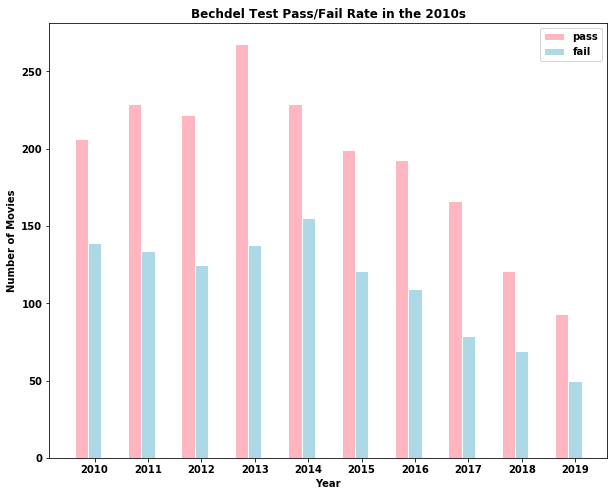

In [349]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# set width of bar
barWidth = 0.25
 
# set size of bar graph
plt.figure(figsize=(10,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [206,229,222,268,229,199,193,166,121,93]
bars2 = [139,134,125,138,155,121,109,79,69,50]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='lightpink', width=barWidth, edgecolor='white', label='pass')
plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='fail')
 
# Adding labels to identify bars, title, and x & y axis
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.ylabel('Number of Movies', fontweight='bold')
plt.title('Bechdel Test Pass/Fail Rate in the 2010s', fontweight='bold')
 
# Create legend & show graphic
plt.legend()
plt.show()
